In [1]:
import bt
import pandas
import matplotlib
import matplotlib.pyplot as plt
import talib

In [2]:
matplotlib.use('TkAgg')
%matplotlib inline

### Build an SMA-based signal strategy
It's time to build and backtest your first signal-based strategy. Although simple, these types of strategies can be effective, and also lay the groundwork for more complex strategies consisting of additional signals and information.

Implementing a price-comparison-based signal with bt is a straightforward process. You will first download some historical price data of the stock, calculate its SMA (simple moving average), implement an SMA-based signal strategy, and then backtest it with the stock price data.

In [3]:
stock_symbol = 'aapl'
start_date = '2019-11-1'
end_date = '2020-12-1'

In [4]:
price_data = bt.get(stock_symbol, start=start_date, end=end_date)
# SMA Rolling Averages
#price_data = price_data.rename(columns = {stock_symbol: 'stock_symbol'})
sma_10 = price_data.rolling(10).mean()
price_data[10:], sma_10[10:]

(                  aapl         spy
 Date                              
 2019-11-15   65.288300  299.639221
 2019-11-18   65.617508  299.860260
 2019-11-19   65.418518  299.773773
 2019-11-20   64.656960  298.658997
 2019-11-21   64.367058  298.178497
 ...                ...         ...
 2020-11-24  114.150986  355.815216
 2020-11-25  115.003372  355.266632
 2020-11-27  115.558411  356.256073
 2020-11-30  117.996658  354.678864
 2020-12-01  121.634178  358.558136
 
 [263 rows x 2 columns],
                   aapl         spy
 Date                              
 2019-11-15   64.024594  296.612973
 2019-11-18   64.279369  297.059851
 2019-11-19   64.523308  297.530753
 2019-11-20   64.688396  297.883447
 2019-11-21   64.751778  298.084302
 ...                ...         ...
 2020-11-24  117.023343  350.823105
 2020-11-25  116.680405  351.409891
 2020-11-27  116.420722  352.434573
 2020-11-30  116.399908  352.822501
 2020-12-01  116.639766  353.160464
 
 [263 rows x 2 columns])

In [5]:
bt_strategy = bt.Strategy('AboveSMA',
                         [
                             bt.algos.SelectWhere(price_data > sma_10),
                             bt.algos.WeighEqually(),
                             bt.algos.Rebalance()
                         ])

In [6]:
bt_backtest = bt.Backtest(bt_strategy, price_data)

In [7]:
bt_result = bt.run(bt_backtest)

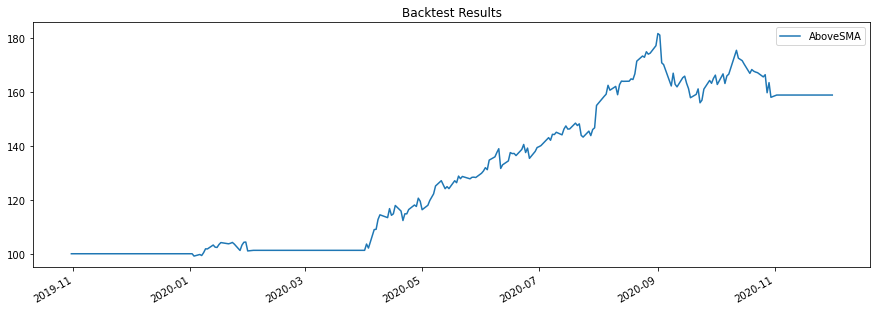

In [8]:
bt_result.plot(title='Backtest Results')
plt.show()

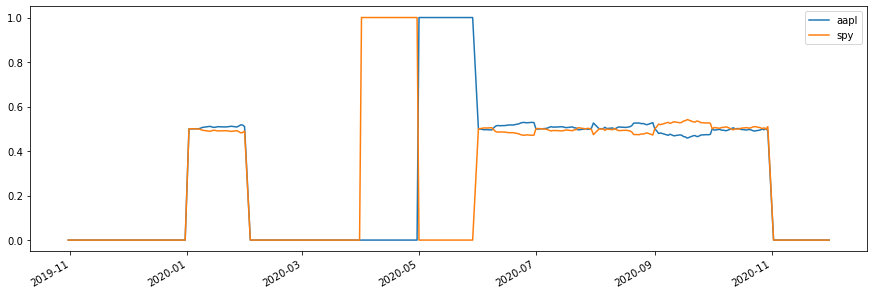

In [10]:
bt_result.plot_security_weights()

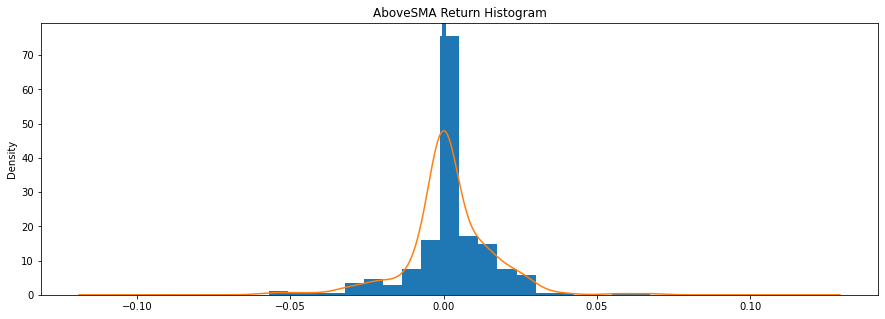

In [11]:
bt_result.plot_histogram()